<h1>COMP2445 - Data Mining Assignment 1: 22005736<h1>
<h2>Analysis of Customer Base<h2>

In [2]:
import numpy as np
import pandas as pd

# Import Matplotlib
import matplotlib as mpl
# Import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
import statistics

In [3]:
#Reads data file
df = pd.read_csv("CivitasMotorsCustomers.csv")
#df.head()
df

,Customer ID,First_Name,Last_Name,Street_Number,Street_Name,City,Country,Postcode,Phone,Age,Reg_Number,Car_Make,Car_Model,Reg_Year,Replacement_Cycle,Retail_Price,Purchase_Date
0,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84,FX29WRA,Ford,Expedition EL,2012,9,85100.0,12/06/2020
1,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84,QP77KAX,Geo,Metro,1995,8,10828.0,02/10/2019
2,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84,WC11IHS,Chevrolet,Suburban 2500,1997,9,44671.0,11/02/2018
3,3,Wernher,Crennan,8,Mccormick,Worcester,United Kingdom,WR3,493-250-7052,23,CI00MUI,Saturn,Relay,2007,9,85878.0,22/07/2020
4,4,Saundra,Iles,6673,Northwestern,Droitwich,United Kingdom,WR9,252-693-3776,54,AT25DRV,Dodge,Durango,2007,9,119030.0,30/06/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2996,Fionnula,Asher,953,Vahlen,Inkberrow,United Kingdom,WR7,505-343-8757,25,WT50AEH,Jensen,Interceptor,1967,3,80422.0,15/12/2018
3996,2997,Allix,Grahamslaw,2,Dryden,Edinburgh,United Kingdom,EH9,390-827-7815,84,WL83FRC,Isuzu,Hombre Space,1999,5,113528.0,13/08/2018
3997,2997,Allix,Grahamslaw,2,Dryden,Edinburgh,United Kingdom,EH9,390-827-7815,84,ZB25NAK,Pontiac,Turbo Firefly,1988,Never,94449.0,25/05/2020
3998,3000,Kalinda,Saphir,120,Fordem,Malvern,United Kingdom,WR14,441-714-3207,47,IX39KOP,Volkswagen,Golf,2010,1,114675.0,23/06/2019


<h1>Exploratory Data Analysis<h1>

In [4]:
df.describe()

,Customer ID,Street_Number,Age,Reg_Year,Retail_Price
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1455.265000,11659.832500,53.860250,1999.926750,65108.893750
std,867.011627,24417.515077,20.903408,9.566518,34314.469328
min,2.000000,0.000000,18.000000,1909.000000,7606.000000
25%,696.000000,26.000000,35.000000,1994.000000,33875.500000
50%,1423.000000,468.000000,54.000000,2001.000000,65165.000000
75%,2200.750000,6962.250000,72.000000,2007.000000,94540.750000
max,3000.000000,99974.000000,90.000000,2013.000000,124975.000000


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3995    False
3996    False
3997    False
3998    False
3999    False
Length: 4000, dtype: bool

In [6]:
customers = df[["Customer ID","First_Name","Last_Name","Street_Number","Street_Name","City","Country","Postcode","Phone","Age"]]
customers

,Customer ID,First_Name,Last_Name,Street_Number,Street_Name,City,Country,Postcode,Phone,Age
0,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84
1,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84
2,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84
3,3,Wernher,Crennan,8,Mccormick,Worcester,United Kingdom,WR3,493-250-7052,23
4,4,Saundra,Iles,6673,Northwestern,Droitwich,United Kingdom,WR9,252-693-3776,54
...,...,...,...,...,...,...,...,...,...,...
3995,2996,Fionnula,Asher,953,Vahlen,Inkberrow,United Kingdom,WR7,505-343-8757,25
3996,2997,Allix,Grahamslaw,2,Dryden,Edinburgh,United Kingdom,EH9,390-827-7815,84
3997,2997,Allix,Grahamslaw,2,Dryden,Edinburgh,United Kingdom,EH9,390-827-7815,84
3998,3000,Kalinda,Saphir,120,Fordem,Malvern,United Kingdom,WR14,441-714-3207,47


In [7]:
customers.duplicated()

0       False
1        True
2        True
3       False
4       False
        ...  
3995     True
3996    False
3997     True
3998    False
3999     True
Length: 4000, dtype: bool

In [8]:
customers = customers.drop_duplicates()
customers

,Customer ID,First_Name,Last_Name,Street_Number,Street_Name,City,Country,Postcode,Phone,Age
0,2,Leela,Marshland,4,Di Loreto,Worcester,United Kingdom,WR4,286-568-0312,84
3,3,Wernher,Crennan,8,Mccormick,Worcester,United Kingdom,WR3,493-250-7052,23
4,4,Saundra,Iles,6673,Northwestern,Droitwich,United Kingdom,WR9,252-693-3776,54
5,5,Jory,O'Teague,7,Moose,Worcester,United Kingdom,WR2,322-897-9153,73
6,6,Vita,Pasley,58,Stoughton,Kidderminster,United Kingdom,DY10,358-697-4488,36
...,...,...,...,...,...,...,...,...,...,...
3989,2994,Rhianon,Belt,1814,Oak,Kidderminster,United Kingdom,DY11,732-834-1505,23
3992,2995,Duncan,Headingham,675,Bluejay,Kidderminster,United Kingdom,DY11,341-828-9354,74
3994,2996,Fionnula,Asher,953,Vahlen,Inkberrow,United Kingdom,WR7,505-343-8757,25
3996,2997,Allix,Grahamslaw,2,Dryden,Edinburgh,United Kingdom,EH9,390-827-7815,84


In [9]:
customers.describe()

,Customer ID,Street_Number,Age
count,2213.000000,2213.000000,2213.000000
mean,1479.431541,11292.778129,53.588342
std,869.690648,23915.967875,20.773666
min,2.000000,0.000000,18.000000
25%,721.000000,22.000000,35.000000
50%,1471.000000,423.000000,53.000000
75%,2234.000000,6859.000000,71.000000
max,3000.000000,99974.000000,90.000000


<Axes: title={'center': 'Locations of Customers'}, xlabel='City', ylabel='Customer Amount'>

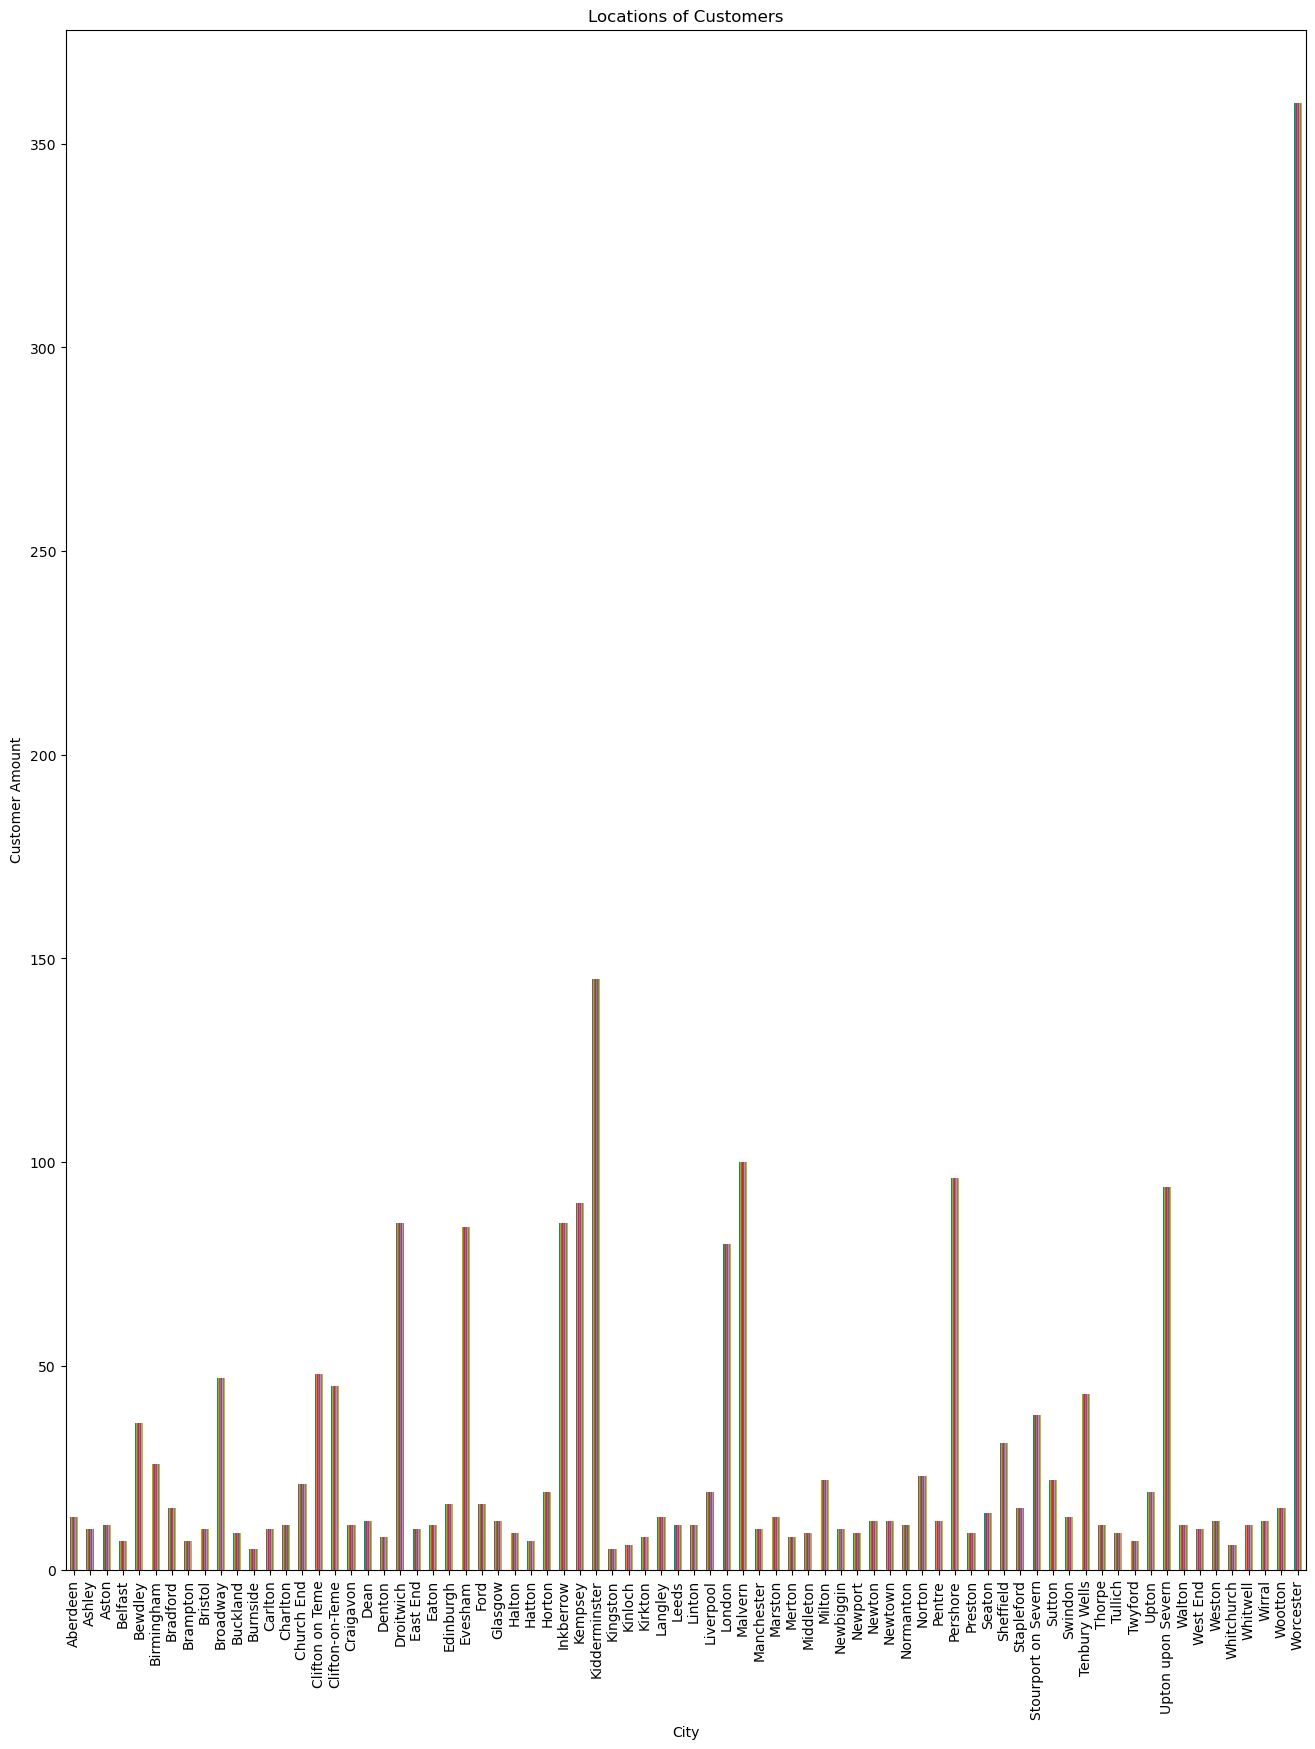

In [10]:
cityLevel = customers.groupby(customers["City"]).count()
cityLevel.plot.bar(title="Locations of Customers",ylabel='Customer Amount',alpha=1, legend=None, figsize = [16, 20])

<Axes: title={'center': 'Comparison between Worcestershire locations without a Dealership'}, xlabel='Towns', ylabel='Customer Amount'>

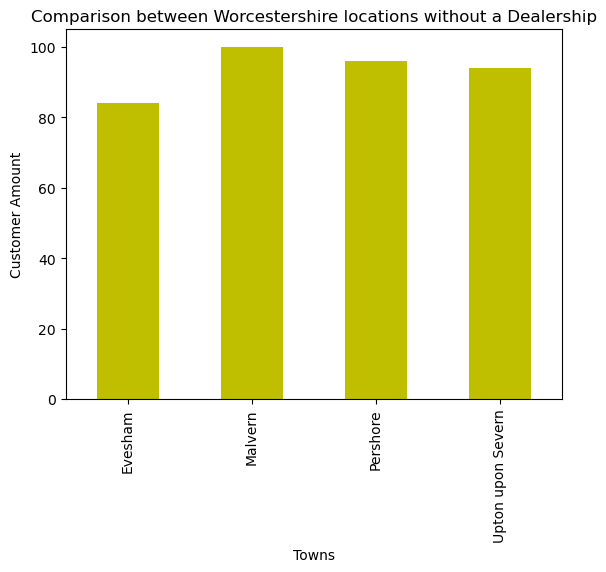

In [11]:
countyCities = customers.groupby(customers["City"].loc[(customers.City == "Evesham") | (customers.City == "Pershore") | (customers.City == "Malvern") | (customers.City == "Upton upon Severn")]).count()
#countyCities.count()
countyCities.plot.bar(title="Comparison between Worcestershire locations without a Dealership", xlabel='Towns', ylabel='Customer Amount', color='y', alpha=1, legend=None)

# What are the age ranges of the customers?

Text(0.5, 1.0, 'Outlier Check for Ages')

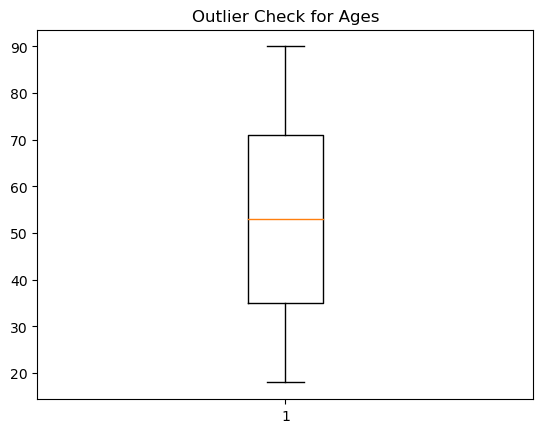

In [12]:
plt.boxplot(customers["Age"])
plt.title("Outlier Check for Ages")

In [13]:
#Calculates the actual range of ages of the customers
range = max(customers["Age"])-min(customers["Age"])
range

72

# On average, how frequently are people changing their cars?

In [14]:
#Indicate the Replacement_Cycle
df["Replacement_Cycle"]

0           9
1           8
2           9
3           9
4           9
        ...  
3995        3
3996        5
3997    Never
3998        1
3999        6
Name: Replacement_Cycle, Length: 4000, dtype: object

In [15]:
df["Replacement_Cycle"].describe()

count     4000
unique      11
top          9
freq       387
Name: Replacement_Cycle, dtype: object

In [16]:
#Replace Never with 0
df["Replacement_Cycle"].describe()

df["Replacement_Cycle"].replace("Never",0,inplace=True)
df["Replacement_Cycle"] = pd.to_numeric(df["Replacement_Cycle"])
df["Replacement_Cycle"].mean()

5.00225

Text(0.5, 1.0, 'Replacement Cycle')

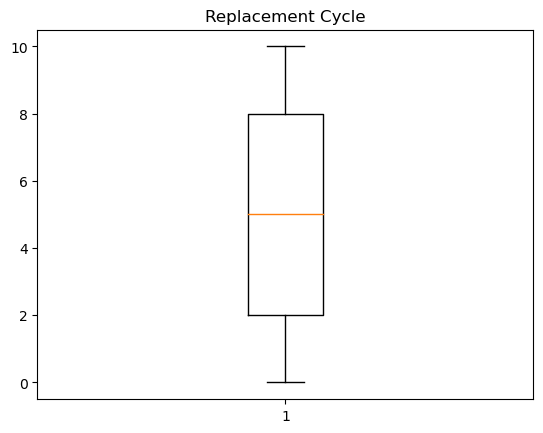

In [17]:
plt.boxplot(df["Replacement_Cycle"])
plt.title("Replacement Cycle")

In [18]:
df["Replacement_Cycle"].mean()

5.00225

# How many customers do Civitas Motors currently have in the WR10 and WR11 postcode areas?

<h2>Total number of customers<h2>

In [19]:
#Selects the rows that either have postcode WR10 or WR11
customerNums = customers.loc[(customers.Postcode == "WR10") | (customers.Postcode == "WR11")] 
customerNums

,Customer ID,First_Name,Last_Name,Street_Number,Street_Name,City,Country,Postcode,Phone,Age
21,18,Humfrid,Hollington,9,Coolidge,Evesham,United Kingdom,WR11,635-287-8609,37
40,35,Marilin,Quan,76,Mayer,Evesham,United Kingdom,WR11,163-882-1349,18
43,36,Binnie,Yokelman,6182,Swallow,Pershore,United Kingdom,WR10,754-713-3561,73
62,50,Bondie,Crosbie,9,Main,Pershore,United Kingdom,WR10,461-112-1568,32
140,116,Adora,Duckett,8111,Iowa,Evesham,United Kingdom,WR11,209-409-7627,80
...,...,...,...,...,...,...,...,...,...,...
3916,2945,Cornelle,Lannin,801,Northland,Pershore,United Kingdom,WR10,561-827-6537,74
3929,2956,Erl,Papierz,5918,Washington,Pershore,United Kingdom,WR10,883-688-8515,55
3959,2975,Olympia,Kevane,652,School,Pershore,United Kingdom,WR10,205-469-7947,25
3966,2978,Tobey,Feary,94834,Mayfield,Pershore,United Kingdom,WR10,565-304-9756,42


In [20]:
customerNums.describe() #The count will show the total amount of customers altogether in the WR10 and WR11 postcodes

,Customer ID,Street_Number,Age
count,180.000000,180.000000,180.000000
mean,1554.555556,10783.166667,52.055556
std,892.099183,22919.677416,19.351417
min,18.000000,0.000000,18.000000
25%,775.750000,30.000000,37.000000
50%,1598.500000,539.500000,51.000000
75%,2337.500000,6332.500000,67.250000
max,2993.000000,94834.000000,90.000000


In [21]:
separatePostcode = customerNums.groupby(customerNums["Postcode"]).count()
separatePostcode

,Customer ID,First_Name,Last_Name,Street_Number,Street_Name,City,Country,Phone,Age
Postcode,,,,,,,,,
WR10,96,96,96,96,96,96,96,96,96
WR11,84,84,84,84,84,84,84,84,84


<Axes: title={'center': 'WR10 vs WR11'}, xlabel='Postcode', ylabel='Customer Total'>

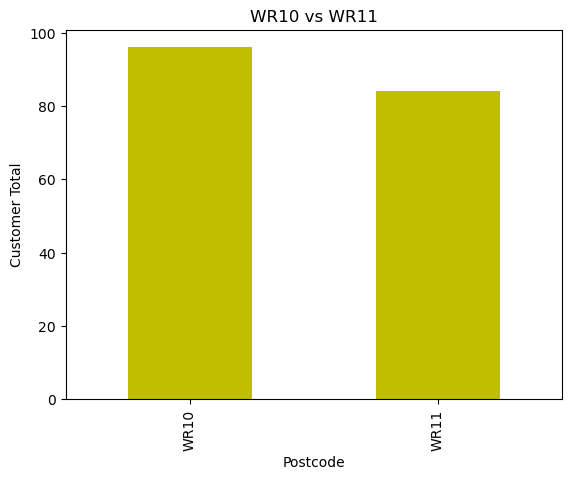

In [22]:
separatePostcode.plot.bar(title="WR10 vs WR11",ylabel='Customer Total', color='y',alpha=1, legend=None) #Shows the difference in a bar chart

<h2>The ages of the customers<h2>

Text(0.5, 1.0, 'Ages of Customers')

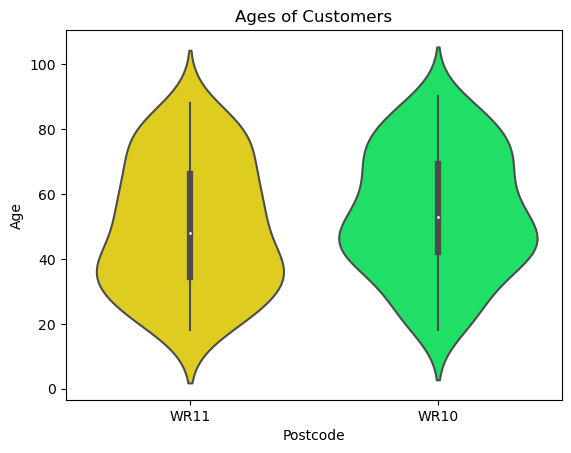

In [23]:
colours = ['#ffe600','#00ff5e']
sns.violinplot(x='Postcode', y='Age', data=customerNums, palette=colours)
plt.title('Ages of Customers')

Text(0.5, 1.0, 'Ages of Customers')

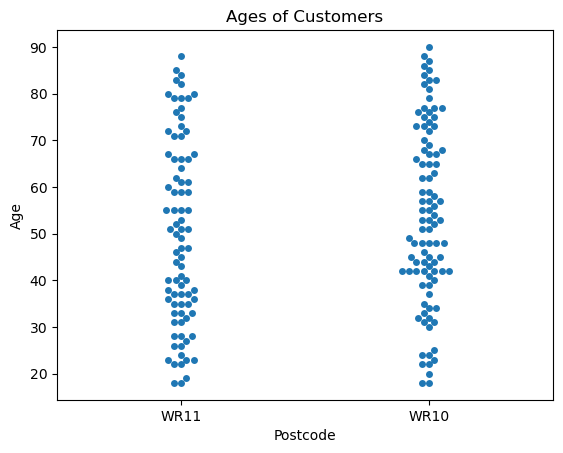

In [24]:
sns.swarmplot(x='Postcode', y='Age', data=customerNums)
plt.title('Ages of Customers')

In [25]:
ages = customerNums["Age"].groupby(customerNums["Postcode"]).mean()
ages

Postcode
WR10    54.020833
WR11    49.809524
Name: Age, dtype: float64

In [26]:
#Selects the rows that either have postcode WR10 or WR11
ages = customerNums.groupby(customerNums["Postcode"]).mean()
ages["Age"].plot.bar(title="WR10 vs WR11",ylabel='Mean Ages', color='y',alpha=1, legend=None) #Shows the difference in a bar chart

TypeError: Could not convert BinnieBondieTrentCarceTallouPrinceSaschaAlleenFrederigoCristalOthilieLorelleLanaTaiteWilowMerwynMalDemetrisRicorikiClaireAngeloCyndyReesCooperRikkiToniaGabeMelindaMalchyYanceOtheliaAlissaVereneOfiliaBlinnyMilesJerryMelaPattyBryanaPeytonFaithKerrLizabethHoweyJethroRaniIzzyAdriaensDenyseRyunRickiHerschLelahLishaJoleeAngelParsifalIbrahimPennieJustisEsmePattieValeryeMatthieuMadyGiffieDanyaHoneyLottyLarryCleveyKalilCarolinNeilsDarrylHoratiaCrystaHymieBertiTienaEmlynneFannyMabelIngridConstancyGardieHerculeScarletRenardRandellCornelleErlOlympiaTobeyBerni to numeric

In [27]:
#Including the postcode with the car details
cars = df[["Postcode","Reg_Number","Car_Make","Car_Model","Reg_Year","Replacement_Cycle","Retail_Price","Purchase_Date"]]  
cars

,Postcode,Reg_Number,Car_Make,Car_Model,Reg_Year,Replacement_Cycle,Retail_Price,Purchase_Date
0,WR4,FX29WRA,Ford,Expedition EL,2012,9,85100.0,12/06/2020
1,WR4,QP77KAX,Geo,Metro,1995,8,10828.0,02/10/2019
2,WR4,WC11IHS,Chevrolet,Suburban 2500,1997,9,44671.0,11/02/2018
3,WR3,CI00MUI,Saturn,Relay,2007,9,85878.0,22/07/2020
4,WR9,AT25DRV,Dodge,Durango,2007,9,119030.0,30/06/2020
...,...,...,...,...,...,...,...,...
3995,WR7,WT50AEH,Jensen,Interceptor,1967,3,80422.0,15/12/2018
3996,EH9,WL83FRC,Isuzu,Hombre Space,1999,5,113528.0,13/08/2018
3997,EH9,ZB25NAK,Pontiac,Turbo Firefly,1988,0,94449.0,25/05/2020
3998,WR14,IX39KOP,Volkswagen,Golf,2010,1,114675.0,23/06/2019


In [28]:
#Filtering the postcode to only have cars with WR10 or WR11 postcodes
cars = cars.loc[(cars.Postcode == "WR10") | (cars.Postcode == "WR11")] 
cars

,Postcode,Reg_Number,Car_Make,Car_Model,Reg_Year,Replacement_Cycle,Retail_Price,Purchase_Date
21,WR11,HN93RSJ,Audi,S4,1994,0,42970.0,31/12/2018
40,WR11,QF25UWU,Mercedes-Benz,500SL,1993,8,48059.0,10/05/2019
41,WR11,HU96IVR,Saturn,Sky,2007,6,80539.0,15/04/2018
42,WR11,UC50DFP,Toyota,Solara,2001,1,121252.0,28/04/2018
43,WR10,MR62KZI,GMC,2500,1996,5,116328.0,25/02/2020
...,...,...,...,...,...,...,...,...
3959,WR10,NF90GDE,Oldsmobile,Ciera,1992,9,37848.0,02/07/2019
3960,WR10,AC75CMQ,Kia,Rondo,2007,9,112281.0,14/04/2020
3966,WR10,IU77YHM,Ford,F150,2006,10,66283.0,01/04/2018
3967,WR10,QR51SSA,Cadillac,Seville,1996,10,53536.0,29/08/2018


In [29]:
cars.describe()

,Reg_Year,Replacement_Cycle,Retail_Price
count,320.000000,320.000000,320.000000
mean,1999.878125,5.353125,64868.587500
std,9.895100,3.201242,34078.248273
min,1953.000000,0.000000,8575.000000
25%,1994.000000,3.000000,34005.750000
50%,2001.000000,5.000000,61595.000000
75%,2007.000000,8.000000,92866.500000
max,2013.000000,10.000000,123888.000000


<h1>The total value of the vehicles<h1>

In [30]:
cars['Retail_Price'].sum() #Prints out the sum of the cars

20757948.0

<h1>The average value of the vehicles, accounting for outliers<h1>

Text(0.5, 1.0, 'Retail Price - Boxplot')

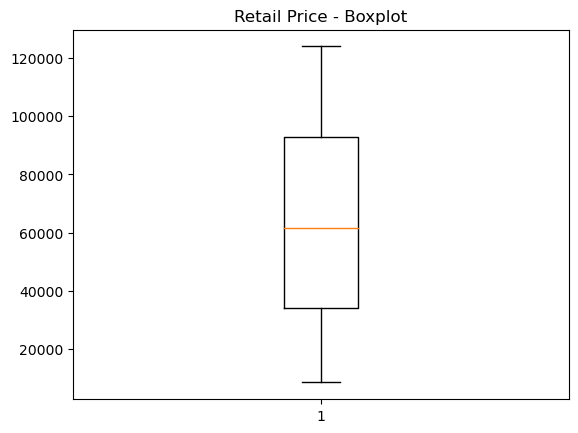

In [31]:
plt.boxplot(cars['Retail_Price']) #Using a boxplot to check for outliers
plt.title("Retail Price - Boxplot")

In [32]:
cars['Retail_Price'].median()

61595.0

In [33]:
cars['Retail_Price'].mean()

64868.5875

In [34]:
cars['Retail_Price'].mode()

0        8575.0
1        8638.0
2        8730.0
3        9169.0
4        9308.0
         ...   
315    122842.0
316    123433.0
317    123736.0
318    123784.0
319    123888.0
Name: Retail_Price, Length: 320, dtype: float64

Text(0.5, 1.0, 'Average Vehicle Retail Prices: Postcode Comparison')

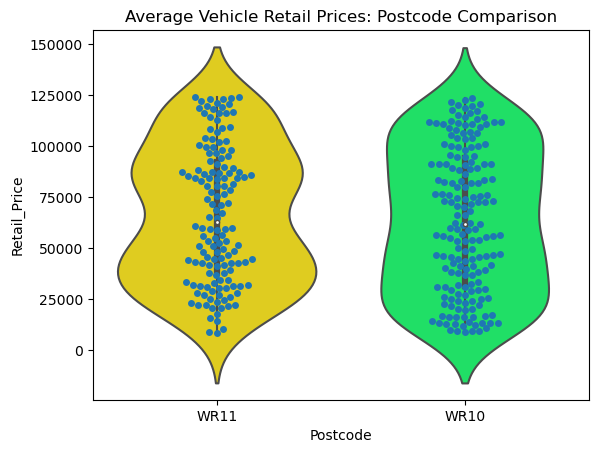

In [35]:
sns.swarmplot(x='Postcode', y='Retail_Price', data=cars)
sns.violinplot(x='Postcode', y='Retail_Price', data=cars, palette=colours)
plt.title('Average Vehicle Retail Prices: Postcode Comparison')

# What is the level of vehicle sales over a fiscal year?

In [36]:
cars.Purchase_Date.min()

'01/01/2018'

In [37]:
cars.Purchase_Date.max()

'31/12/2020'

In [38]:
#Fiscal Year runs April-April
#https://datagy.io/pandas-fiscal-year/
cars['Purchase_Date'] = pd.to_datetime(cars['Purchase_Date'])
cars['Fiscal Year'] = cars['Purchase_Date'].dt.to_period('Q-APR').dt.qyear.apply(lambda x: str(x-1) + "-" + str(x))
cars

C:\Users\lukem\AppData\Local\Temp\ipykernel_7500\3039516044.py:3: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cars['Purchase_Date'] = pd.to_datetime(cars['Purchase_Date'])
C:\Users\lukem\AppData\Local\Temp\ipykernel_7500\3039516044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars['Purchase_Date'] = pd.to_datetime(cars['Purchase_Date'])
C:\Users\lukem\AppData\Local\Temp\ipykernel_7500\3039516044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Postcode,Reg_Number,Car_Make,Car_Model,Reg_Year,Replacement_Cycle,Retail_Price,Purchase_Date,Fiscal Year
21,WR11,HN93RSJ,Audi,S4,1994,0,42970.0,2018-12-31,2018-2019
40,WR11,QF25UWU,Mercedes-Benz,500SL,1993,8,48059.0,2019-05-10,2019-2020
41,WR11,HU96IVR,Saturn,Sky,2007,6,80539.0,2018-04-15,2017-2018
42,WR11,UC50DFP,Toyota,Solara,2001,1,121252.0,2018-04-28,2017-2018
43,WR10,MR62KZI,GMC,2500,1996,5,116328.0,2020-02-25,2019-2020
...,...,...,...,...,...,...,...,...,...
3959,WR10,NF90GDE,Oldsmobile,Ciera,1992,9,37848.0,2019-07-02,2019-2020
3960,WR10,AC75CMQ,Kia,Rondo,2007,9,112281.0,2020-04-14,2019-2020
3966,WR10,IU77YHM,Ford,F150,2006,10,66283.0,2018-04-01,2017-2018
3967,WR10,QR51SSA,Cadillac,Seville,1996,10,53536.0,2018-08-29,2018-2019


<Axes: title={'center': 'Level of Vehicle Sales'}, xlabel='Fiscal Year', ylabel='Vehicle Sales'>

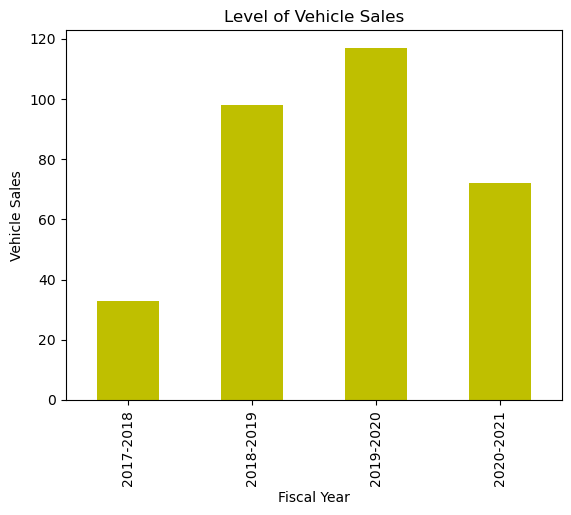

In [39]:
fYLevels = cars.groupby(cars["Fiscal Year"]).count()
fYLevels.plot.bar(title="Level of Vehicle Sales",ylabel='Vehicle Sales', color='y',alpha=1, legend=None)

In [40]:
fYLevels

,Postcode,Reg_Number,Car_Make,Car_Model,Reg_Year,Replacement_Cycle,Retail_Price,Purchase_Date
Fiscal Year,,,,,,,,
2017-2018,33,33,33,33,33,33,33,33
2018-2019,98,98,98,98,98,98,98,98
2019-2020,117,117,117,117,117,117,117,117
2020-2021,72,72,72,72,72,72,72,72


# Analysis of Marketing Channels

In [41]:
roi = pd.read_csv("MarketingChannelROI.csv")
roi

,Post,Online,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


{'whiskers': [<matplotlib.lines.Line2D at 0x1f8e08a0f90>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8e08a2310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8e08a0790>,
 'medians': [<matplotlib.lines.Line2D at 0x1f8e08a33d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f8e08a2110>,
 'means': []}

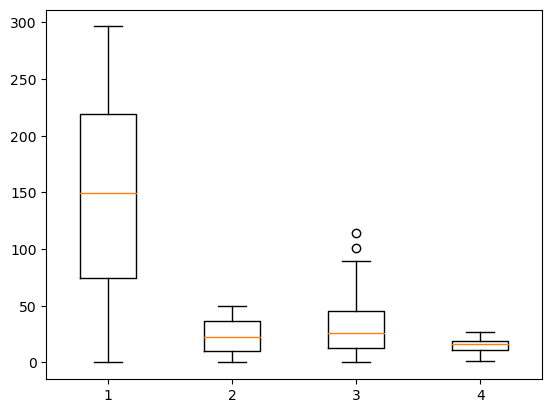

In [42]:
plt.boxplot(roi) #Using a boxplot to check for outliers

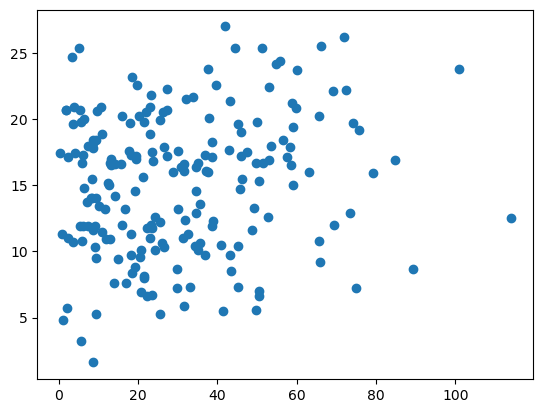

In [43]:
plt.scatter(roi['Newspaper'],roi['Sales']) #Creating a scatter plot to go into further detail

In [44]:
roi = roi.loc[roi.Newspaper < 100] #Removing the outliers from the newpaper variable
roi

,Post,Online,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [45]:
roi.corr() #Looks the correlation between the different values

,Post,Online,Newspaper,Sales
Post,1.000000,0.051978,0.049771,0.899974
Online,0.051978,1.000000,0.346364,0.348566
Newspaper,0.049771,0.346364,1.000000,0.151764
Sales,0.899974,0.348566,0.151764,1.000000


In [46]:
x = roi[['Post','Online','Newspaper']]
y = roi['Sales']

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression(fit_intercept=True)

In [49]:
model.fit(x,y)

LinearRegression()

In [50]:
print(model.coef_) #Prints out the regression coefficients for each relationship with the dependent variable.

[0.05454452 0.1069161  0.00086314]


In [52]:
x = roi['Post']
model.fit(x[:,np.newaxis],y)
xfit = np.linspace(0,x.max(),30) #This is a rough estimate
yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(x[:,np.newaxis],y)
plt.plot(xfit,yfit,'y')
plt.title("Linear Regression: Post vs Sales")
plt.xlabel("Post")
plt.ylabel("Sales")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [53]:
pmodel = np.poly1d(np.polyfit(x,y,1))
#model.fit(x[:,np.newaxis],y)
xfit = np.linspace(0,x.max(),30) #This is a rough estimate
#yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(np.asarray(x[:,np.newaxis]),y)
plt.plot(xfit, pmodel(xfit))
plt.title("Polynomial Regression: Post vs Sales")
plt.xlabel("Post")
plt.ylabel("Sales")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

In [ ]:
x = roi['Online']
model.fit(np.asarray(x[:,np.newaxis]),y)
xfit = np.linspace(0,50,1000)
yfit = model.predict(np.asarray(xfit[:,np.newaxis]))
plt.scatter(np.asarray(x[:,np.newaxis]),y)
plt.plot(xfit,yfit,'y')
plt.title("Linear Regression: Online vs Sales")
plt.xlabel("Online")
plt.ylabel("Sales")

In [ ]:
pmodel = np.poly1d(np.polyfit(x,y,11))
xfit = np.linspace(0,50,1000)
plt.scatter(np.asarray(x[:,np.newaxis]),y)
plt.plot(xfit, pmodel(xfit))
plt.title("Polynomial Regression: Online vs Sales")
plt.xlabel("Online")
plt.ylabel("Sales")

In [ ]:
x = roi['Newspaper']
model.fit(x[:,np.newaxis],y)
xfit = np.linspace(0,100,30) #This is a rough estimate
yfit = model.predict(xfit[:,np.newaxis])
plt.scatter(x[:,np.newaxis],y)
plt.plot(xfit,yfit,'y')
plt.title("Linear Regression: Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")

In [ ]:
pmodel = np.poly1d(np.polyfit(x,y,2))
xfit = np.linspace(0,100,30)
plt.scatter(np.asarray(x[:,np.newaxis]),y)
plt.plot(xfit, pmodel(xfit))
plt.title("Polynomial Regression: Newspaper vs Sales")
plt.xlabel("Newspaper")
plt.ylabel("Sales")